# Stock analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("stock_prices.csv")
df.head()

,date,ticker,open,high,low,close,adjusted_close,volume,sector
0,2014-01-02,AAPL,19.845715,19.893929,19.715000,19.754642,17.253258,234684800,Electronics
1,2014-01-03,AAPL,19.745000,19.775000,19.301071,19.320715,16.874273,392467600,Electronics
2,2014-01-06,AAPL,19.194643,19.528570,19.057142,19.426071,16.966291,412610800,Electronics
3,2014-01-07,AAPL,19.440000,19.498571,19.211430,19.287144,16.844955,317209200,Electronics
4,2014-01-08,AAPL,19.243214,19.484285,19.238930,19.409286,16.951628,258529600,Electronics


In [3]:
print(pd.unique(df["ticker"]))

['AAPL' 'ABBV' 'ABT' 'ACN' 'ADBE' 'AMD' 'AMGN' 'AMZN' 'AVGO' 'BAC' 'CAT'
 'CMCSA' 'COP' 'COST' 'CRM' 'CSCO' 'CVX' 'DHR' 'DIS' 'GOOG' 'GOOGL' 'HD'
 'JNJ' 'JPM' 'KO' 'LIN' 'LLY' 'MA' 'MCD' 'META' 'MRK' 'MS' 'MSFT' 'NFLX'
 'NKE' 'NVDA' 'ORCL' 'PEP' 'PFE' 'PG' 'PM' 'TMO' 'TMUS' 'TSLA' 'TXN' 'UNH'
 'UPS' 'V' 'WFC' 'WMT' 'XOM']


In [4]:
df.dtypes

date               object
ticker             object
open              float64
high              float64
low               float64
close             float64
adjusted_close    float64
volume              int64
sector             object
dtype: object

In [5]:
type(df["date"][0])

str

In [6]:
df["date"][0].year

AttributeError: 'str' object has no attribute 'year'

In [ ]:
pd.to_datetime(df["date"][0])

In [7]:
pd.to_datetime(df["date"])

0        2014-01-02
1        2014-01-03
2        2014-01-06
3        2014-01-07
4        2014-01-08
            ...    
139020   2024-10-24
139021   2024-10-25
139022   2024-10-28
139023   2024-10-29
139024   2024-10-30
Name: date, Length: 139025, dtype: datetime64[ns]

In [8]:
type(df["date"][0])

str

In [9]:
df["date"] = pd.to_datetime(df["date"])

In [10]:
df.dtypes

date              datetime64[ns]
ticker                    object
open                     float64
high                     float64
low                      float64
close                    float64
adjusted_close           float64
volume                     int64
sector                    object
dtype: object

In [11]:
df["date"][0].weekday() # Thursday

3

In [12]:
df["date"][0].year

2014

In [13]:
df["date"][0].quarter

1

In [14]:
df["date"][0].day

2

In [15]:
df["date"].day

AttributeError: 'Series' object has no attribute 'day'

In [16]:
df["date"].dt.day

0          2
1          3
2          6
3          7
4          8
          ..
139020    24
139021    25
139022    28
139023    29
139024    30
Name: date, Length: 139025, dtype: int32

In [17]:
apple_stocks = df[df["ticker"] == "AAPL"]

In [18]:
apple_stocks["ticker"].value_counts()

ticker
AAPL    2726
Name: count, dtype: int64

In [19]:
apple_stocks.set_index("date", inplace=True) #creates new data frame by default

In [20]:
apple_stocks.head()

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2014-01-02,AAPL,19.845715,19.893929,19.715000,19.754642,17.253258,234684800,Electronics
2014-01-03,AAPL,19.745000,19.775000,19.301071,19.320715,16.874273,392467600,Electronics
2014-01-06,AAPL,19.194643,19.528570,19.057142,19.426071,16.966291,412610800,Electronics
2014-01-07,AAPL,19.440000,19.498571,19.211430,19.287144,16.844955,317209200,Electronics
2014-01-08,AAPL,19.243214,19.484285,19.238930,19.409286,16.951628,258529600,Electronics


In [21]:
# access February 3, 2020
apple_stocks.loc["2020-02-03"]

ticker                   AAPL
open                   76.075
high                  78.3725
low                    75.555
close                  77.165
adjusted_close       74.89244
volume              173788400
sector            Electronics
Name: 2020-02-03 00:00:00, dtype: object

In [22]:
# select February
apple_stocks_feb_2020 = apple_stocks.loc["2020-02-01":"2020-02-28"]

In [23]:
apple_stocks_feb_2020

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2020-02-03,AAPL,76.0750,78.3725,75.5550,77.1650,74.892440,173788400,Electronics
2020-02-04,AAPL,78.8275,79.9100,78.4075,79.7125,77.364890,136616400,Electronics
2020-02-05,AAPL,80.8800,81.1900,79.7375,80.3625,77.995760,118826800,Electronics
2020-02-06,AAPL,80.6425,81.3050,80.0650,81.3025,78.908070,105425600,Electronics
2020-02-07,AAPL,80.5925,80.8500,79.5000,80.0075,77.835510,117684000,Electronics
2020-02-10,AAPL,78.5450,80.3875,78.4625,80.3875,78.205185,109348800,Electronics
2020-02-11,AAPL,80.9000,80.9750,79.6775,79.9025,77.733350,94323200,Electronics
2020-02-12,AAPL,80.3675,81.8050,80.3675,81.8000,79.579340,113730400,Electronics
2020-02-13,AAPL,81.0475,81.5550,80.8375,81.2175,79.012650,94747600,Electronics


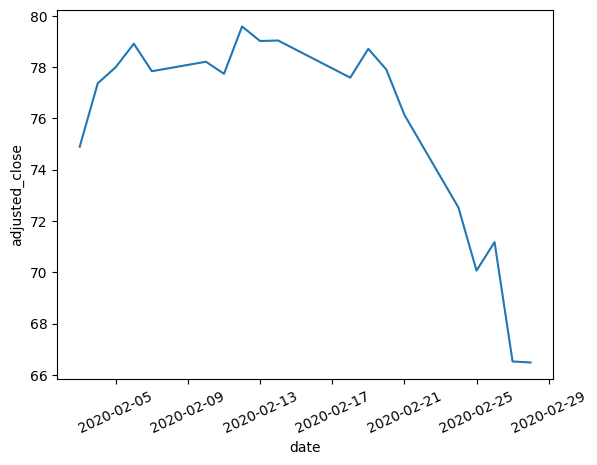

In [24]:
sns.lineplot(apple_stocks_feb_2020["adjusted_close"])
plt.xticks(rotation=25)
plt.show()

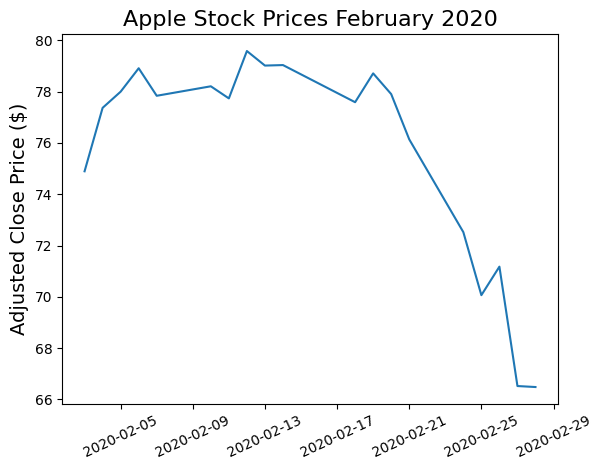

In [25]:
sns.lineplot(apple_stocks_feb_2020["adjusted_close"])
plt.title("Apple Stock Prices February 2020", fontsize=16)
plt.xlabel("")
plt.ylabel("Adjusted Close Price ($)", fontsize=14)
plt.xticks(rotation=25)
plt.show()

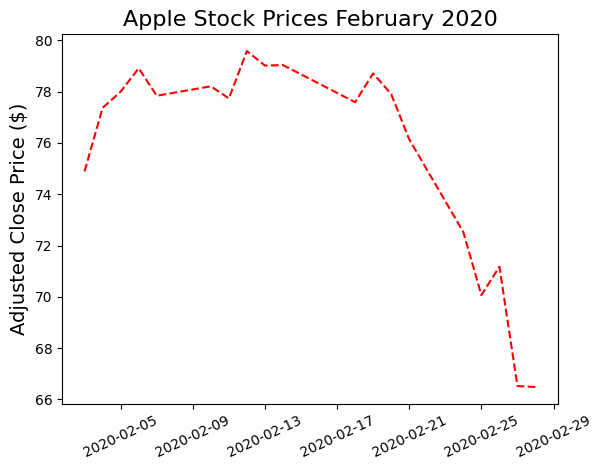

In [26]:
sns.lineplot(apple_stocks_feb_2020["adjusted_close"], color="red", linestyle="--")
plt.title("Apple Stock Prices February 2020", fontsize=16)
plt.xlabel("")
plt.ylabel("Adjusted Close Price ($)", fontsize=14)
plt.xticks(rotation=25)
plt.show()

In [27]:
apple_stocks_jan_2020 = apple_stocks.loc["2020-01-01":"2020-01-31"]
apple_stocks_jan_2020.head()

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2020-01-02,AAPL,74.0600,75.150,73.7975,75.0875,72.876114,135480400,Electronics
2020-01-03,AAPL,74.2875,75.145,74.1250,74.3575,72.167610,146322800,Electronics
2020-01-06,AAPL,73.4475,74.990,73.1875,74.9500,72.742650,118387200,Electronics
2020-01-07,AAPL,74.9600,75.225,74.3700,74.5975,72.400536,108872000,Electronics
2020-01-08,AAPL,74.2900,76.110,74.2900,75.7975,73.565210,132079200,Electronics


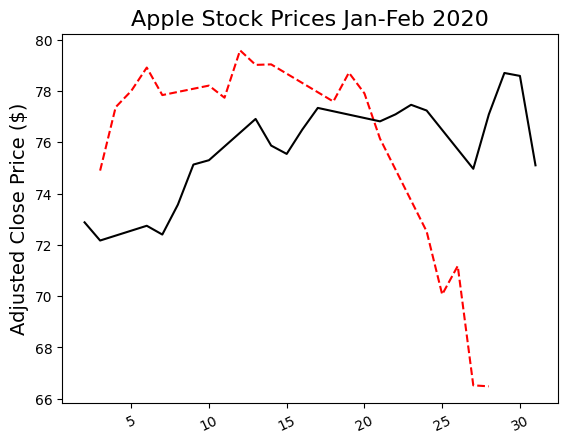

In [28]:
sns.lineplot(x=apple_stocks_feb_2020.index.day,
             y=apple_stocks_feb_2020["adjusted_close"], 
             color="red", 
             linestyle="--")
sns.lineplot(x=apple_stocks_jan_2020.index.day,
             y=apple_stocks_jan_2020["adjusted_close"],
             color="black")
plt.title("Apple Stock Prices Jan-Feb 2020", fontsize=16)
plt.xlabel("")
plt.ylabel("Adjusted Close Price ($)", fontsize=14)
plt.xticks(rotation=25)
plt.show()

In [29]:
apple_stocks_jan_2020.index.day

Index([2, 3, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 21, 22, 23, 24, 27, 28, 29,
       30, 31],
      dtype='int32', name='date')

In [30]:
apple_stocks_mar_2020 = apple_stocks.loc["2020-03-01":"2020-03-31"]

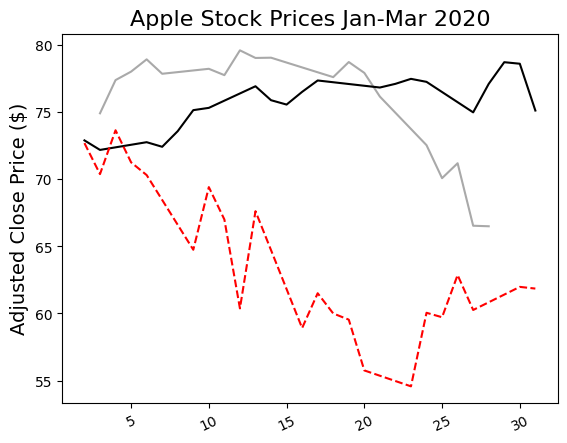

In [31]:
sns.lineplot(x=apple_stocks_feb_2020.index.day, 
             y=apple_stocks_feb_2020["adjusted_close"], 
             color="darkgray")
sns.lineplot(x=apple_stocks_jan_2020.index.day, 
             y=apple_stocks_jan_2020["adjusted_close"], 
             color="black")
sns.lineplot(x=apple_stocks_mar_2020.index.day, 
             y=apple_stocks_mar_2020["adjusted_close"], 
             color="red", 
             linestyle="--")
plt.xticks(rotation=25)
plt.title("Apple Stock Prices Jan-Mar 2020", fontsize=16)
plt.xlabel("")
plt.ylabel("Adjusted Close Price ($)", fontsize=14)
plt.show()

/tmp/ipykernel_126/276365386.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


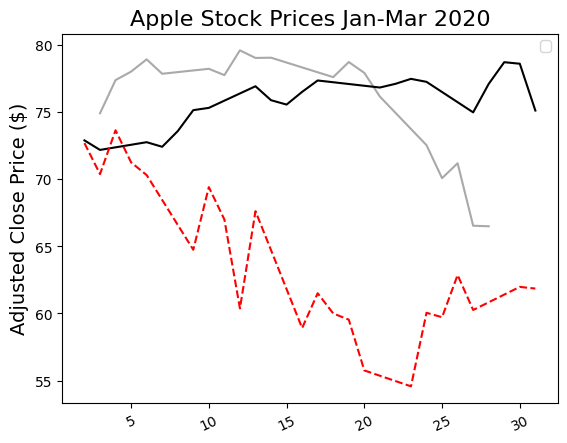

In [32]:
sns.lineplot(x=apple_stocks_feb_2020.index.day, 
             y=apple_stocks_feb_2020["adjusted_close"], 
             color="darkgray")
sns.lineplot(x=apple_stocks_jan_2020.index.day, 
             y=apple_stocks_jan_2020["adjusted_close"], 
             color="black")
sns.lineplot(x=apple_stocks_mar_2020.index.day, 
             y=apple_stocks_mar_2020["adjusted_close"], 
             color="red", 
             linestyle="--")
plt.xticks(rotation=25)
plt.title("Apple Stock Prices Jan-Mar 2020", fontsize=16)
plt.xlabel("")
plt.ylabel("Adjusted Close Price ($)", fontsize=14)
plt.legend()
plt.show()

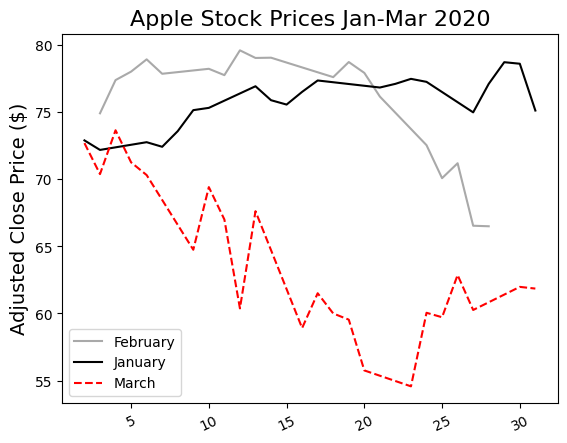

In [33]:
sns.lineplot(x=apple_stocks_feb_2020.index.day, 
             y=apple_stocks_feb_2020["adjusted_close"], 
             color="darkgray", 
             label="February")
sns.lineplot(x=apple_stocks_jan_2020.index.day, 
             y=apple_stocks_jan_2020["adjusted_close"], 
             color="black", 
             label="January")
sns.lineplot(x=apple_stocks_mar_2020.index.day, 
             y=apple_stocks_mar_2020["adjusted_close"], 
             color="red", 
             linestyle="--", 
             label="March")
plt.xticks(rotation=25)
plt.title("Apple Stock Prices Jan-Mar 2020", fontsize=16)
plt.xlabel("")
plt.ylabel("Adjusted Close Price ($)", fontsize=14)
plt.legend()
plt.show()

In [34]:
# Set up Amazon stocks
amazon_stocks = df[ df["ticker"] == "AMZN"]
amazon_stocks.set_index("date", inplace=True)

In [35]:
amazon_stocks.head()

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2014-01-02,AMZN,19.9400,19.9680,19.7010,19.8985,19.8985,42756000,Retail
2014-01-03,AMZN,19.9145,20.1355,19.8110,19.8220,19.8220,44204000,Retail
2014-01-06,AMZN,19.7925,19.8500,19.4210,19.6815,19.6815,63412000,Retail
2014-01-07,AMZN,19.7520,19.9235,19.7145,19.9015,19.9015,38320000,Retail
2014-01-08,AMZN,19.9235,20.1500,19.8020,20.0960,20.0960,46330000,Retail


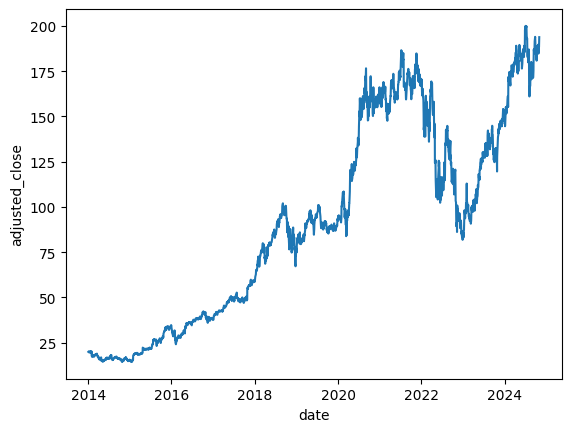

In [36]:
sns.lineplot(amazon_stocks["adjusted_close"])
plt.show()

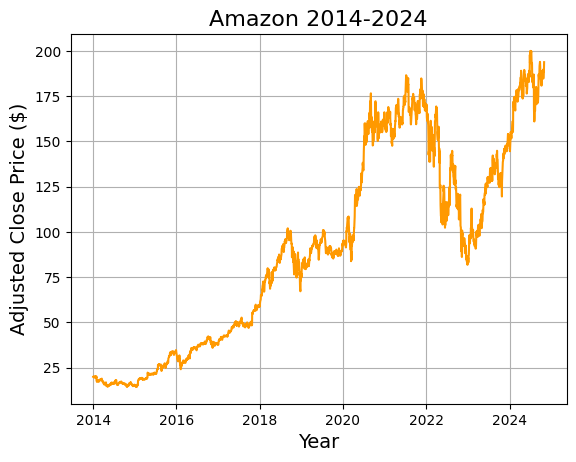

In [37]:
sns.lineplot(amazon_stocks["adjusted_close"], color="#FF9900")
plt.title("Amazon 2014-2024", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Adjusted Close Price ($)",fontsize=14)
plt.grid()
plt.show()

In [38]:
import matplotlib.dates as mdates

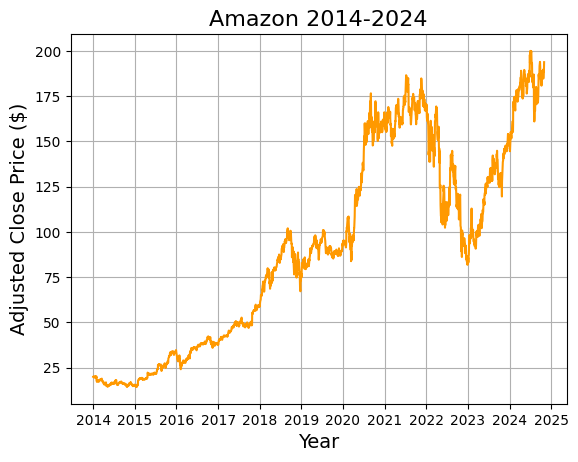

In [39]:
ax = sns.lineplot(amazon_stocks["adjusted_close"], color="#FF9900")
plt.title("Amazon 2014-2024", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Adjusted Close Price ($)",fontsize=14)
plt.grid()

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator()) # don't need to memorize this!

plt.show()

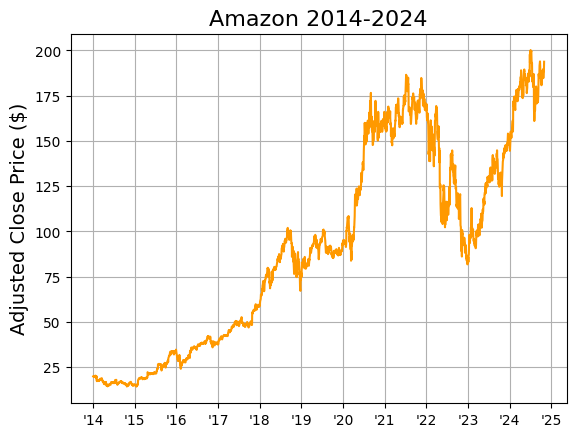

In [40]:
ax = sns.lineplot(amazon_stocks["adjusted_close"], color="#FF9900")
plt.title("Amazon 2014-2024", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Adjusted Close Price ($)",fontsize=14)
plt.grid()

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator()) # don't need to memorize this!
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y")) # use date formatter string

plt.show()

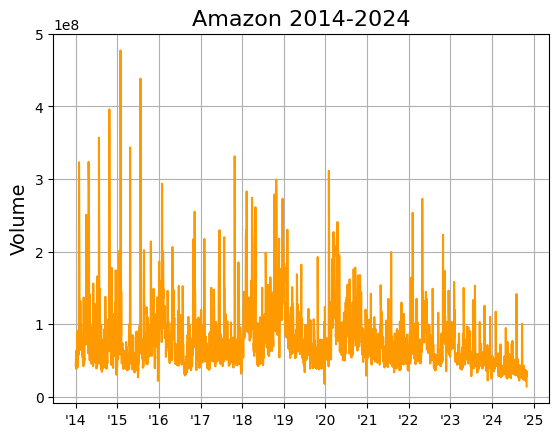

In [41]:
ax = sns.lineplot(amazon_stocks["volume"], color="#FF9900")
plt.title("Amazon 2014-2024", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Volume",fontsize=14)
plt.grid()

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator()) # don't need to memorize this!
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y")) # use date formatter string

plt.show()

In [42]:
# Calculate moving average
amazon_stocks["volume"].rolling(window=14) # two week moving average

Rolling [window=14,center=False,axis=0,method=single]

In [43]:
amazon_volume_14day = amazon_stocks["volume"].rolling(window=14).mean()

In [44]:
amazon_volume_14day[:14]

date
2014-01-02             NaN
2014-01-03             NaN
2014-01-06             NaN
2014-01-07             NaN
2014-01-08             NaN
2014-01-09             NaN
2014-01-10             NaN
2014-01-13             NaN
2014-01-14             NaN
2014-01-15             NaN
2014-01-16             NaN
2014-01-17             NaN
2014-01-21             NaN
2014-01-22    5.240829e+07
Name: volume, dtype: float64

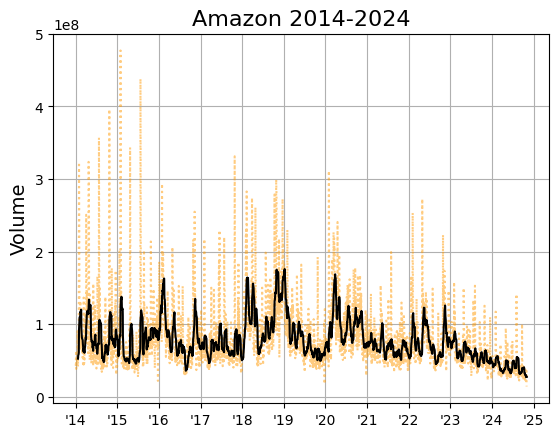

In [45]:
ax = sns.lineplot(amazon_stocks["volume"], color="#FF9900", alpha=0.5, linestyle=":")
sns.lineplot(amazon_volume_14day, color="black")
plt.title("Amazon 2014-2024", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Volume",fontsize=14)
plt.grid()

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator()) # don't need to memorize this!
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y")) # use date formatter string

plt.show()

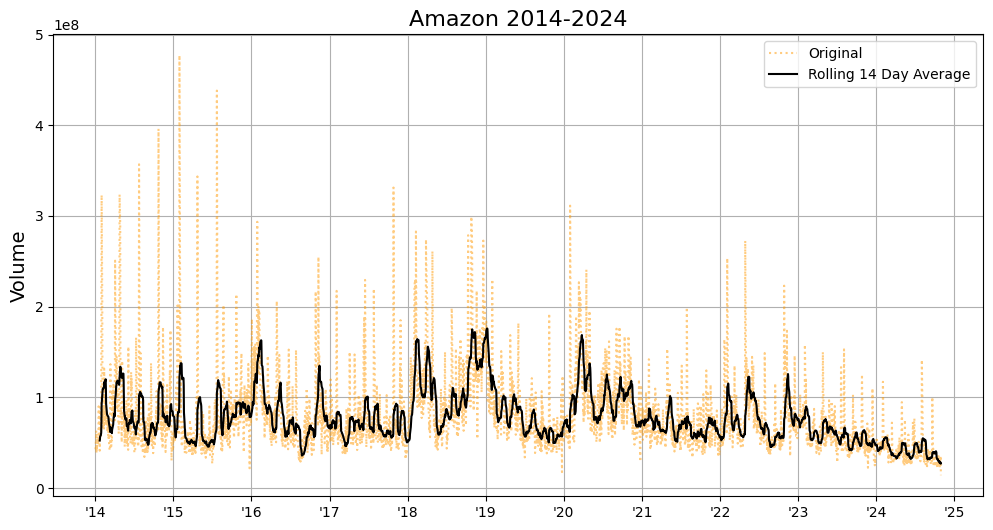

In [46]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(amazon_stocks["volume"], 
                  color="#FF9900", 
                  alpha=0.5, 
                  linestyle=":", 
                  label="Original")
sns.lineplot(amazon_volume_14day, 
             color="black",
             label="Rolling 14 Day Average")
plt.title("Amazon 2014-2024", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Volume",fontsize=14)
plt.grid()

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator()) # don't need to memorize this!
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y")) # use date formatter string

plt.show()

In [47]:
amazon_volume_90day = amazon_stocks["volume"].rolling(window=90).mean()

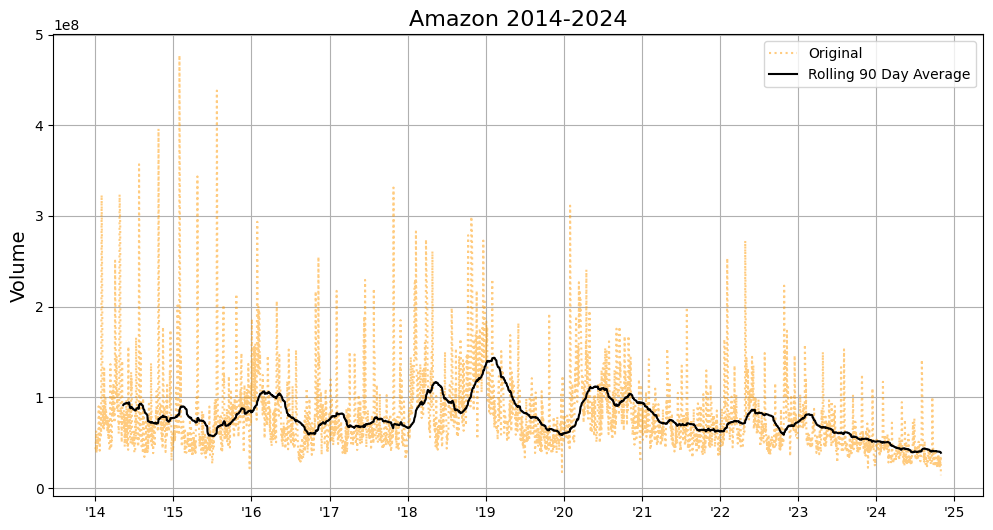

In [48]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(amazon_stocks["volume"], 
                  color="#FF9900", 
                  alpha=0.5, 
                  linestyle=":", 
                  label="Original")
sns.lineplot(amazon_volume_90day, 
             color="black",
             label="Rolling 90 Day Average")
plt.title("Amazon 2014-2024", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Volume",fontsize=14)
plt.grid()

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator()) # don't need to memorize this!
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y")) # use date formatter string

plt.show()

In [49]:
# Investigate adjusted close price
amazon_close_pct_change = amazon_stocks["adjusted_close"].pct_change() # fractional change!

In [50]:
amazon_close_pct_change.head()

date
2014-01-02         NaN
2014-01-03   -0.003845
2014-01-06   -0.007088
2014-01-07    0.011178
2014-01-08    0.009773
Name: adjusted_close, dtype: float64

In [51]:
amazon_close_pct_change * 100

date
2014-01-02         NaN
2014-01-03   -0.384451
2014-01-06   -0.708808
2014-01-07    1.117801
2014-01-08    0.977313
                ...   
2024-10-24    0.904120
2024-10-25    0.777980
2024-10-28    0.298142
2024-10-29    1.295186
2024-10-30    1.551119
Name: adjusted_close, Length: 2726, dtype: float64

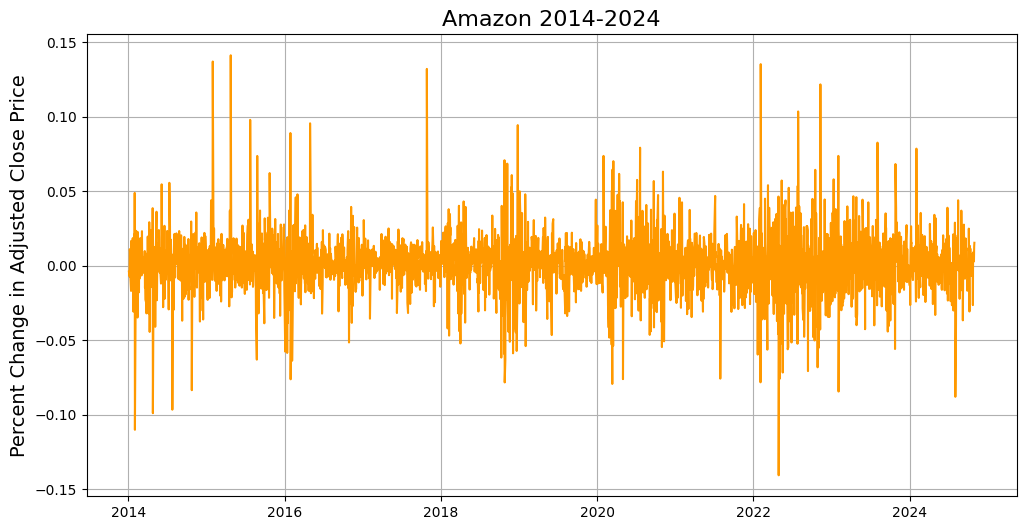

In [52]:
plt.figure(figsize=(12,6))

sns.lineplot(amazon_close_pct_change, color="#FF9900")
plt.title("Amazon 2014-2024", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Percent Change in Adjusted Close Price",fontsize=14)
plt.grid()
plt.show()

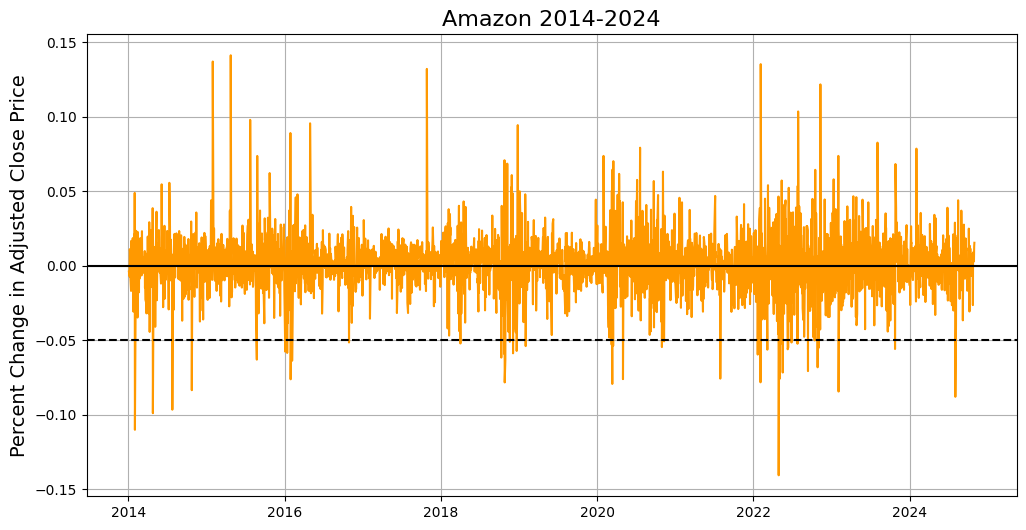

In [53]:
plt.figure(figsize=(12,6))

sns.lineplot(amazon_close_pct_change, color="#FF9900")
plt.axhline(y=-0.05, color="black", linestyle='--')  # Add this line
plt.axhline(y=0, color="black")  
plt.title("Amazon 2014-2024", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Percent Change in Adjusted Close Price", fontsize=14)
plt.grid()
plt.show()

In [54]:
dips = amazon_close_pct_change[amazon_close_pct_change < -0.05]

In [55]:
dips.head()

date
2014-01-31   -0.109972
2014-04-25   -0.098828
2014-07-25   -0.096484
2014-10-24   -0.083403
2015-08-24   -0.062896
Name: adjusted_close, dtype: float64

In [56]:
dips.count()

np.int64(44)

In [57]:
dips.count() / len(amazon_stocks)

np.float64(0.016140865737344093)

In [58]:
dips.count() / amazon_stocks.count()

ticker            0.016141
open              0.016141
high              0.016141
low               0.016141
close             0.016141
adjusted_close    0.016141
volume            0.016141
sector            0.016141
dtype: float64

In [59]:
print(dips.index)

DatetimeIndex(['2014-01-31', '2014-04-25', '2014-07-25', '2014-10-24',
               '2015-08-24', '2016-01-04', '2016-01-13', '2016-01-29',
               '2016-02-05', '2016-10-28', '2018-04-02', '2018-10-10',
               '2018-10-24', '2018-10-26', '2018-10-29', '2018-11-19',
               '2018-12-04', '2018-12-21', '2019-02-01', '2020-03-09',
               '2020-03-12', '2020-03-16', '2020-05-01', '2020-10-30',
               '2020-11-09', '2021-07-30', '2022-01-21', '2022-02-03',
               '2022-03-07', '2022-04-29', '2022-05-05', '2022-05-09',
               '2022-05-18', '2022-06-10', '2022-06-13', '2022-06-28',
               '2022-07-26', '2022-09-13', '2022-10-14', '2022-10-28',
               '2022-11-01', '2023-02-03', '2023-10-25', '2024-08-02'],
              dtype='datetime64[ns]', name='date', freq=None)


In [60]:
# select Netflix stocks
netflix_stocks = df[ df["ticker"] == "NFLX"]

# change date column to datetime type & setting as index
netflix_stocks.set_index(netflix_stocks["date"], inplace=True)

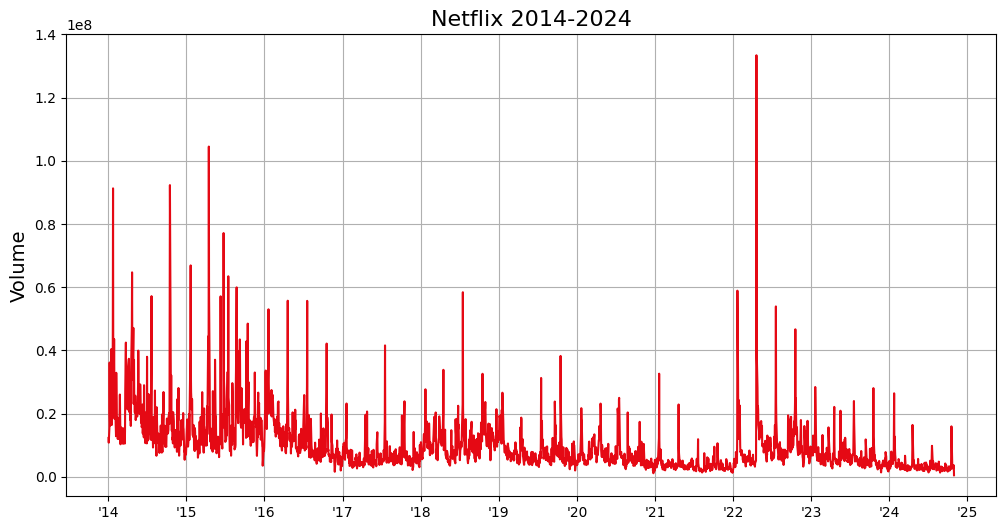

In [61]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(netflix_stocks["volume"], color="#E50914")

# adjust axes to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y"))

plt.title("Netflix 2014-2024", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Volume",fontsize=14)
plt.grid()
plt.show()

In [62]:
netflix_stocks.head()

,date,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,,
2014-01-02,2014-01-02,NFLX,52.401430,52.511430,51.542860,51.831430,51.831430,12325600,Tech Services
2014-01-03,2014-01-03,NFLX,52.000000,52.495712,51.842857,51.871430,51.871430,10817100,Tech Services
2014-01-06,2014-01-06,NFLX,51.890000,52.044285,50.475716,51.367140,51.367140,15501500,Tech Services
2014-01-07,2014-01-07,NFLX,49.684284,49.698570,48.152860,48.500000,48.500000,36167600,Tech Services
2014-01-08,2014-01-08,NFLX,48.104286,49.425713,48.074287,48.712856,48.712856,20001100,Tech Services


In [63]:
netflix_stocks.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype='int32', name='date', length=2726)

In [64]:
print(pd.unique(netflix_stocks.index.month))

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [65]:
netflix_stocks["month"] = netflix_stocks.index.month

/tmp/ipykernel_126/325231307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_stocks["month"] = netflix_stocks.index.month


In [66]:
netflix_stocks.head()

,date,ticker,open,high,low,close,adjusted_close,volume,sector,month
date,,,,,,,,,,
2014-01-02,2014-01-02,NFLX,52.401430,52.511430,51.542860,51.831430,51.831430,12325600,Tech Services,1
2014-01-03,2014-01-03,NFLX,52.000000,52.495712,51.842857,51.871430,51.871430,10817100,Tech Services,1
2014-01-06,2014-01-06,NFLX,51.890000,52.044285,50.475716,51.367140,51.367140,15501500,Tech Services,1
2014-01-07,2014-01-07,NFLX,49.684284,49.698570,48.152860,48.500000,48.500000,36167600,Tech Services,1
2014-01-08,2014-01-08,NFLX,48.104286,49.425713,48.074287,48.712856,48.712856,20001100,Tech Services,1


In [67]:
monthly_volume = netflix_stocks.groupby("month")["volume"].mean()

In [68]:
monthly_volume

month
1     1.410399e+07
2     8.827254e+06
3     8.982469e+06
4     1.337481e+07
5     9.103363e+06
6     9.102217e+06
7     1.152011e+07
8     7.832642e+06
9     8.806715e+06
10    1.215103e+07
11    7.902156e+06
12    7.617274e+06
Name: volume, dtype: float64

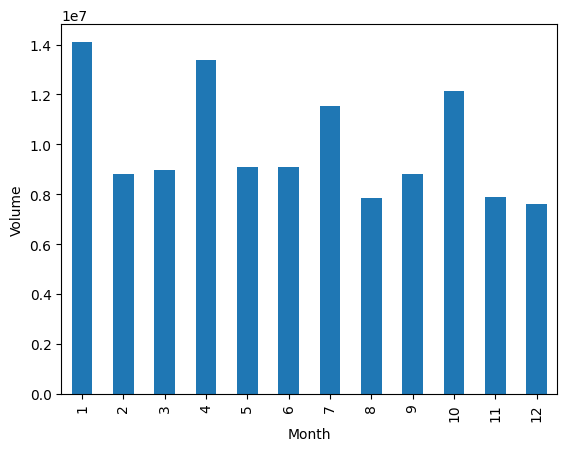

In [69]:
monthly_volume.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.show()

/tmp/ipykernel_126/244588698.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(netflix_stocks, x="month", y="volume", palette=colors)


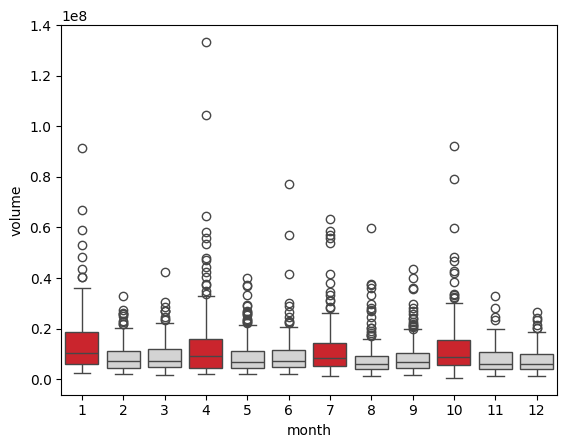

In [70]:
# Segmented boxplot
colors = [
    "#E50914", "lightgray", "lightgray",
    "#E50914", "lightgray", "lightgray",
    "#E50914", "lightgray", "lightgray",
    "#E50914", "lightgray", "lightgray"
]

sns.boxplot(netflix_stocks, x="month", y="volume", palette=colors)
plt.show()

/tmp/ipykernel_126/2091154053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(netflix_stocks, x="month", y="volume", palette=colors)


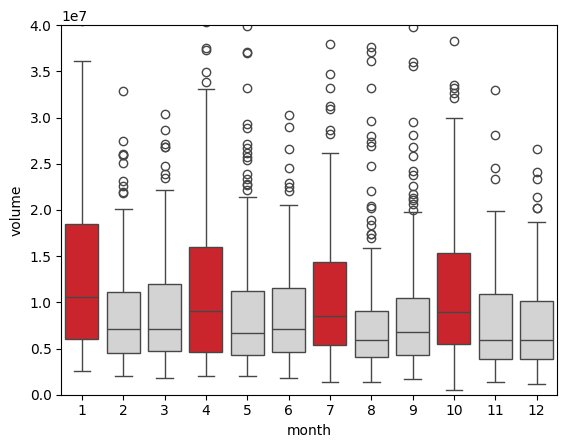

In [71]:
sns.boxplot(netflix_stocks, x="month", y="volume", palette=colors)
plt.ylim(0, 40000000)
plt.show()

In [72]:
df.head()

,date,ticker,open,high,low,close,adjusted_close,volume,sector
0,2014-01-02,AAPL,19.845715,19.893929,19.715000,19.754642,17.253258,234684800,Electronics
1,2014-01-03,AAPL,19.745000,19.775000,19.301071,19.320715,16.874273,392467600,Electronics
2,2014-01-06,AAPL,19.194643,19.528570,19.057142,19.426071,16.966291,412610800,Electronics
3,2014-01-07,AAPL,19.440000,19.498571,19.211430,19.287144,16.844955,317209200,Electronics
4,2014-01-08,AAPL,19.243214,19.484285,19.238930,19.409286,16.951628,258529600,Electronics


In [82]:
# filter for one ticker
df[df["ticker"] == "AAPL"]

,date,ticker,open,high,low,close,adjusted_close,volume,sector
0,2014-01-02,AAPL,19.845715,19.893929,19.715000,19.754642,17.253258,234684800,Electronics
1,2014-01-03,AAPL,19.745000,19.775000,19.301071,19.320715,16.874273,392467600,Electronics
2,2014-01-06,AAPL,19.194643,19.528570,19.057142,19.426071,16.966291,412610800,Electronics
3,2014-01-07,AAPL,19.440000,19.498571,19.211430,19.287144,16.844955,317209200,Electronics
4,2014-01-08,AAPL,19.243214,19.484285,19.238930,19.409286,16.951628,258529600,Electronics
...,...,...,...,...,...,...,...,...,...
2721,2024-10-24,AAPL,229.980000,230.820000,228.410000,230.570000,230.570000,31109500,Electronics
2722,2024-10-25,AAPL,229.740000,233.220000,229.570000,231.410000,231.410000,38802300,Electronics
2723,2024-10-28,AAPL,233.320000,234.730000,232.550000,233.400000,233.400000,36087100,Electronics
2724,2024-10-29,AAPL,233.100000,234.330000,232.320000,233.670000,233.670000,35332800,Electronics


In [83]:
# filter for multiple tickers
tickers = ["AAPL", "AMZN"]
selected_stocks = df[df["ticker"].isin(tickers)]

In [84]:
print(pd.unique(selected_stocks["ticker"]))

['AAPL' 'AMZN']


In [85]:
selected_stocks.sample(10)

,date,ticker,open,high,low,close,adjusted_close,volume,sector
1470,2019-11-04,AAPL,64.3325,64.4625,63.8450,64.3750,62.29208,103272000,Electronics
21617,2024-01-31,AMZN,157.0000,159.0100,154.8100,155.2000,155.20000,50284400,Retail
20642,2020-03-17,AMZN,88.7735,92.8890,84.4620,90.3920,90.39200,218342000,Retail
19101,2014-01-31,AMZN,18.5880,18.7725,17.8880,17.9345,17.93450,323096000,Retail
917,2017-08-23,AAPL,39.7675,40.1175,39.7200,39.9950,37.54190,77596400,Electronics
21581,2023-12-07,AMZN,146.1500,147.9200,145.3400,146.8800,146.88000,52352800,Retail
21600,2024-01-05,AMZN,144.6900,146.5900,144.5300,145.2400,145.24000,45124800,Retail
19083,2014-01-06,AMZN,19.7925,19.8500,19.4210,19.6815,19.68150,63412000,Retail
2117,2022-05-31,AAPL,149.0700,150.6600,146.8400,148.8400,147.00476,103718400,Electronics
19916,2017-04-27,AMZN,45.7195,46.0930,45.6055,45.9190,45.91900,106110000,Retail


In [86]:
# interested in the adjusted_close for Apple and Amazon
# datetime     AAPL    AMZN
# 2018-08-02     10      85
# need to .pivot() your data
pivoted_stocks = selected_stocks.pivot(index="date",
                      columns="ticker",
                      values="adjusted_close")

In [87]:
pivoted_stocks.head()

ticker,AAPL,AMZN
date,,
2014-01-02,17.253258,19.8985
2014-01-03,16.874273,19.8220
2014-01-06,16.966291,19.6815
2014-01-07,16.844955,19.9015
2014-01-08,16.951628,20.0960


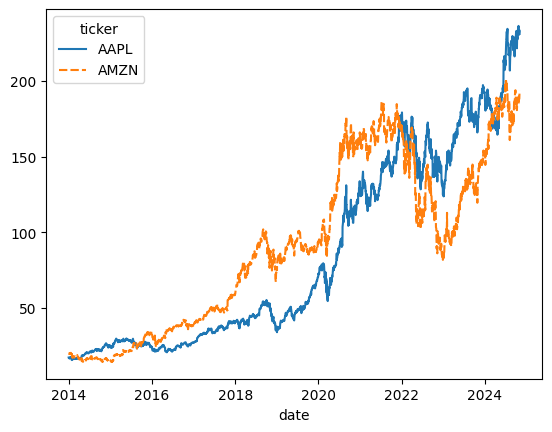

In [88]:
sns.lineplot(pivoted_stocks)
plt.show()

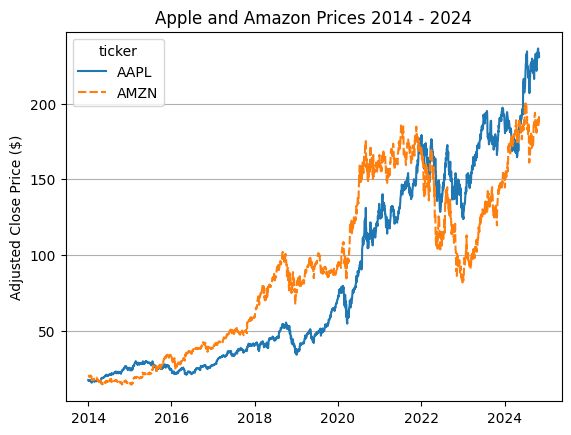

In [89]:
sns.lineplot(pivoted_stocks)
plt.xlabel("")
plt.ylabel("Adjusted Close Price ($)")
plt.title("Apple and Amazon Prices 2014 - 2024")
plt.grid(axis="y")
plt.show()

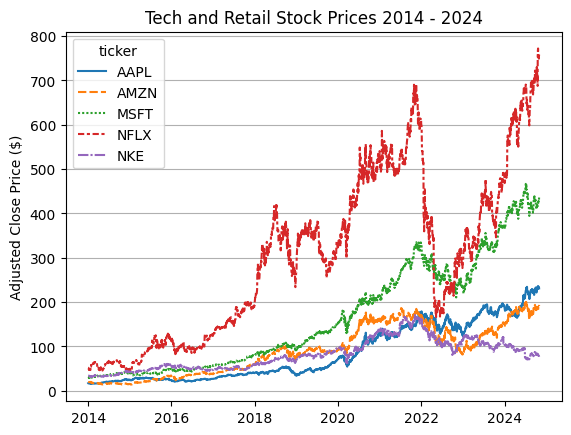

In [90]:
tickers = ["AAPL", "AMZN", "NFLX", "NKE", "MSFT"]
selected_stocks = df[df["ticker"].isin(tickers)]
pivoted_stocks = selected_stocks.pivot(index="date",
                      columns="ticker",
                      values="adjusted_close")

sns.lineplot(pivoted_stocks)
plt.xlabel("")
plt.ylabel("Adjusted Close Price ($)")
plt.title("Tech and Retail Stock Prices 2014 - 2024")
plt.grid(axis="y")
plt.show()

In [109]:
nike_stocks = df[ df["ticker"] == "NKE"]
nike_stocks.set_index(nike_stocks["date"], inplace=True)

# Create weekly Nike stock time series
nike_stocks.resample("W")

In [110]:
nike_stocks.resample("W").mean()

TypeError: agg function failed [how->mean,dtype->object]

In [111]:
# Select only numeric columns
numeric_data = nike_stocks.select_dtypes(include='number')

# Resample and calculate the mean
nike_weekly = numeric_data.resample("W").mean()

In [112]:
numeric_data

,open,high,low,close,adjusted_close,volume
date,,,,,,
2014-01-02,39.075,39.415,38.965,39.1200,34.626877,5318600
2014-01-03,39.075,39.315,38.980,39.0150,34.533930,5597000
2014-01-06,39.235,39.300,38.705,38.7150,34.268394,6045800
2014-01-07,38.855,39.000,38.705,38.7450,34.294937,6769000
2014-01-08,38.750,38.975,38.465,38.5450,34.117910,6897800
...,...,...,...,...,...,...
2024-10-24,80.500,80.800,79.030,79.0400,79.040000,7424500
2024-10-25,79.220,79.580,78.520,78.8500,78.850000,9385400
2024-10-28,79.320,79.640,78.820,78.9100,78.910000,6617200


In [113]:
nike_weekly

,open,high,low,close,adjusted_close,volume
date,,,,,,
2014-01-05,39.075000,39.365000,38.972500,39.067500,34.580404,5457800.0
2014-01-12,38.810000,38.936000,38.521000,38.602000,34.168365,6216760.0
2014-01-19,37.701000,37.811000,37.252000,37.396000,33.100880,7324600.0
2014-01-26,36.675000,36.812500,36.321250,36.453750,32.266854,9822050.0
2014-02-02,36.195000,36.549000,36.012000,36.317000,32.145812,10012000.0
...,...,...,...,...,...,...
2024-10-06,85.124000,86.388000,84.258000,84.996000,84.996000,18865140.0
2024-10-13,81.894000,82.508000,80.860000,81.660000,81.660000,10725780.0
2024-10-20,82.616000,83.512000,81.982000,82.796000,82.796000,9524400.0


In [114]:
numeric_data.resample("ME").mean()

,open,high,low,close,adjusted_close,volume
date,,,,,,
2014-01-31,37.541905,37.736190,37.245476,37.405952,33.109691,7.998600e+06
2014-02-28,37.207895,37.588158,37.020000,37.359737,33.079962,7.204221e+06
2014-03-31,38.686429,38.924762,38.331429,38.557381,34.233641,8.501514e+06
2014-04-30,36.634762,36.905952,36.273571,36.526190,32.430226,7.910781e+06
2014-05-31,37.022857,37.293810,36.820476,37.111190,32.959854,5.402095e+06
...,...,...,...,...,...,...
2024-06-30,93.996842,95.097368,93.080000,94.048421,93.630778,1.613395e+07
2024-07-31,73.543182,74.314091,72.781364,73.487273,73.160936,1.799413e+07
2024-08-31,79.147273,80.094091,78.416364,79.434545,79.081798,1.139772e+07


In [115]:
numeric_data.resample("W-MON").mean()

,open,high,low,close,adjusted_close,volume
date,,,,,,
2014-01-06,39.128333,39.343333,38.883333,38.9500,34.476400,5653800.0
2014-01-13,38.646000,38.768000,38.280000,38.3770,33.969207,6660080.0
2014-01-20,37.522500,37.648750,37.190000,37.3475,33.057949,7090150.0
2014-01-27,36.531000,36.676000,36.229000,36.3530,32.177677,10139960.0
2014-02-03,36.280000,36.602000,35.918000,36.2150,32.055525,9632880.0
...,...,...,...,...,...,...
2024-10-07,83.612000,84.932000,82.730000,83.4820,83.482000,19013200.0
2024-10-14,81.866000,82.422000,81.002000,81.8140,81.814000,9807840.0
2024-10-21,82.786000,83.722000,82.110000,82.7720,82.772000,9398900.0


In [116]:
nike_stocks.resample("W").first()

,date,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,,
2014-01-05,2014-01-02,NKE,39.075,39.415,38.965,39.120,34.626877,5318600,Consumer Packaged Goods
2014-01-12,2014-01-06,NKE,39.235,39.300,38.705,38.715,34.268394,6045800,Consumer Packaged Goods
2014-01-19,2014-01-13,NKE,38.415,38.460,37.500,37.590,33.272602,8262400,Consumer Packaged Goods
2014-01-26,2014-01-21,NKE,37.070,37.300,36.705,36.875,32.639725,13147000,Consumer Packaged Goods
2014-02-02,2014-01-27,NKE,35.955,36.130,35.860,35.950,31.820970,11411600,Consumer Packaged Goods
...,...,...,...,...,...,...,...,...,...
2024-10-06,2024-09-30,NKE,89.700,89.750,87.730,88.400,88.400000,12027100,Consumer Packaged Goods
2024-10-13,2024-10-07,NKE,82.140,82.470,80.090,80.830,80.830000,12767400,Consumer Packaged Goods
2024-10-20,2024-10-14,NKE,82.000,82.040,80.800,81.600,81.600000,8177700,Consumer Packaged Goods
